Rewrite all recorded files into PCM format so they can be read properly

In [ ]:
import os
import numpy as np
import librosa
from scipy.io import wavfile

# Define the directory containing the .wav files
input_directory = "/content/drive/My Drive/LaurenMLIoTFinalProject/dataset/banana"
output_directory = "/content/drive/My Drive/LaurenMLIoTFinalProject/dataset/banananew"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Get a list of all .wav files in the directory
filenames = [file for file in os.listdir(input_directory) if file.endswith(".wav")]

# Define the desired length (16000 samples)
desired_length = 16000

# Define the target sample rate
target_sample_rate = 16000

# Loop through each file in the directory
for filename in filenames:
    # Read the audio data
    selected_filename = os.path.join(input_directory, filename)
    audio_data, fs = librosa.load(selected_filename, sr=None)

    # Resample the audio to the target sample rate
    audio_data_resampled = librosa.resample(audio_data, orig_sr=fs, target_sr=target_sample_rate)

    # Trim or pad the audio to the desired length
    current_length = len(audio_data_resampled)
    if current_length < desired_length:
        # If the current length is less, zero-pad the audio signal
        padded_audio_data = np.pad(audio_data_resampled, (0, desired_length - current_length), 'constant')
    elif current_length > desired_length:
        # If the current length is greater, trim the audio signal
        padded_audio_data = audio_data_resampled[:desired_length]
    else:
        # If the current length is equal, no adjustment is needed
        padded_audio_data = audio_data_resampled

    # Convert audio data to 16-bit PCM format
    pcm_audio_data = (padded_audio_data * 32767).astype(np.int16)

    # Save the PCM audio to the output directory
    output_filename = os.path.join(output_directory, filename)
    wavfile.write(output_filename, target_sample_rate, pcm_audio_data)

    print(f"Processed: {filename}")

print("All files processed.")

Streaming output truncated to the last 5000 lines.
Processed: Banana7_4_down.wav
Processed: Banana7_4_trim.wav
Processed: Banana7_5_long.wav
Processed: Banana7_5_short.wav
Processed: Banana7_5_up.wav
Processed: Banana7_5_down.wav
Processed: Banana7_5_trim.wav
Processed: Banana7_6_long.wav
Processed: Banana7_6_short.wav
Processed: Banana7_6_up.wav
Processed: Banana7_6_down.wav
Processed: Banana7_6_trim.wav
Processed: Banana7_7_long.wav
Processed: Banana7_7_short.wav
Processed: Banana7_7_up.wav
Processed: Banana7_7_down.wav
Processed: Banana7_7_trim.wav
Processed: Banana7_8_long.wav
Processed: Banana7_8_short.wav
Processed: Banana7_8_up.wav
Processed: Banana7_8_down.wav
Processed: Banana7_8_trim.wav
Processed: Banana7_9_long.wav
Processed: Banana7_9_short.wav
Processed: Banana7_9_up.wav
Processed: Banana7_9_down.wav
Processed: Banana7_9_trim.wav
Processed: Banana7_10_long.wav
Processed: Banana7_10_short.wav
Processed: Banana7_10_up.wav
Processed: Banana7_10_down.wav
Processed: Banana7_10

Importing necessary libraries

In [ ]:
!apt install libasound-dev portaudio19-dev libportaudio2 libportaudiocpp0
!pip install pyaudio
!pip install pydub

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libasound2-dev' instead of 'libasound-dev'
libasound2-dev is already the newest version (1.2.6.1-1ubuntu1).
libportaudio2 is already the newest version (19.6.0-1.1).
libportaudiocpp0 is already the newest version (19.6.0-1.1).
portaudio19-dev is already the newest version (19.6.0-1.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
import tensorflow as tf
from tensorflow.lite.experimental.microfrontend.python.ops import audio_microfrontend_op as frontend_op
import numpy as np
import time
from scipy.io import wavfile
import random
import sys
import io
import os
import pathlib
import glob
from datetime import datetime as dt
from numpy import log as ln
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import IPython
import IPython.display as ipd
import tensorflow as tf
%matplotlib inline
import pyaudio
from queue import Queue
from threading import Thread
import math
import time
import librosa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Helper libraries
from IPython import display as ipd
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa.util
import numpy as np
import glob
import os

data_dir = '/content/drive/My Drive/LaurenMLIoTFinalProject/dataset/'

Make directories to store new files in if not already done

In [ ]:
# Set the word you want to augment
custom_word = 'banana'

# Check if the directory for the raw audio files of the custom word already exists
if os.path.exists(os.path.join(data_dir, (custom_word))):
    # If it does, print an error message
    print(f'Error: The directory {os.path.join(data_dir, (custom_word))} already exists.')
    raw_audio_dir = os.path.join(data_dir, (custom_word))

else:
    print(f'Creating the directory {os.path.join(data_dir, (custom_word))}')
    # Set the path for the raw audio files
    raw_audio_dir = os.path.join(data_dir, (custom_word))
    # Create the directory
    os.makedirs(raw_audio_dir)

# Check if the directory for the augmented audio files of the custom word already exists
if os.path.exists(os.path.join(data_dir,(custom_word + 'new'))):
    # If it does, print an error message
    print(f'Error: The directory {os.path.join(data_dir, (custom_word +"new"))} already exists.')
    aug_audio_dir = os.path.join(data_dir, (custom_word))

else:
    print(f'Creating the directory {os.path.join(data_dir, (custom_word + "new"))}')
    # Set the path for the augmented audio files
    aug_audio_dir = os.path.join(data_dir, (custom_word + 'new'))
    # Create the directory
    os.makedirs(aug_audio_dir)

Error: The directory /content/drive/My Drive/LaurenMLIoTFinalProject/dataset/banana already exists.
Creating the directory /content/drive/My Drive/LaurenMLIoTFinalProject/dataset/banananew


Data Augmentation

In [ ]:
import os
import glob
import numpy as np
import librosa
from scipy.io import wavfile

raw_audio_dir = '/content/drive/My Drive/LaurenMLIoTFinalProject/banana_pcm'
aug_audio_dir = '/content/drive/My Drive/LaurenMLIoTFinalProject/dataset/banananew'

# Ensure the output directory exists
os.makedirs(aug_audio_dir, exist_ok=True)

# Get a list of all .wav files in the raw data directory
filenames = glob.glob(os.path.join(raw_audio_dir, '*.wav'))

# Counter for augmented files
augmented_count = 0

# Define the target number of augmentations per original file
target_augmentations = 50

for wav_file in filenames:
    # Load the audio file
    fs, wav = wavfile.read(wav_file)

    # Normalize the audio data
    wav = wav / np.max(np.abs(wav))

    # Apply augmentations until reaching the target number
    while augmented_count < target_augmentations:
        # Apply time stretching to the audio (rate>1 => faster/shorter)
        wav_long = librosa.effects.time_stretch(wav, rate=np.random.uniform(0.5, 0.8))
        # Apply time stretching to the audio (rate<1 => slower/longer)
        wav_short = librosa.effects.time_stretch(wav, rate=np.random.uniform(1.2, 1.5))
        # Apply pitch shifting to the audio (n_steps>0 => higher pitch)
        wav_up = librosa.effects.pitch_shift(wav, sr=fs, n_steps=np.random.randint(3, 8), bins_per_octave=12)
        # Apply pitch shifting to the audio (n_steps<0 => lower pitch)
        wav_dn = librosa.effects.pitch_shift(wav, sr=fs, n_steps=np.random.randint(-6, -2), bins_per_octave=12)
        # Trim the silent parts of the audio
        wav_trim, _ = librosa.effects.trim(wav, top_db=40)

        # Get the base filename (without the directory)
        base_filename = os.path.basename(wav_file)

        # Save the augmented audio files to the new data directory
        wavfile.write(os.path.join(aug_audio_dir, os.path.splitext(base_filename)[0] + f'_{augmented_count}_long.wav'), fs, wav_long)
        wavfile.write(os.path.join(aug_audio_dir, os.path.splitext(base_filename)[0] + f'_{augmented_count}_short.wav'), fs, wav_short)
        wavfile.write(os.path.join(aug_audio_dir, os.path.splitext(base_filename)[0] + f'_{augmented_count}_up.wav'), fs, wav_up)
        wavfile.write(os.path.join(aug_audio_dir, os.path.splitext(base_filename)[0] + f'_{augmented_count}_down.wav'), fs, wav_dn)
        wavfile.write(os.path.join(aug_audio_dir, os.path.splitext(base_filename)[0] + f'_{augmented_count}_trim.wav'), fs, wav_trim)

        # Increment the augmented count
        augmented_count += 1

    # Reset the augmented count for the next original file
    augmented_count = 0


Play audio from the original recorded files to make sure they imported correctly

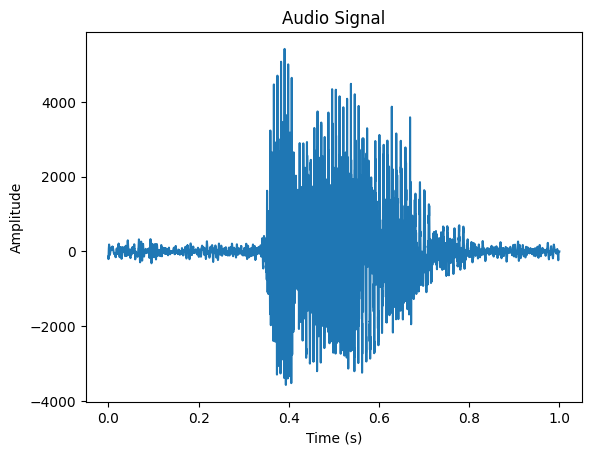

In [ ]:
data_dir = '/content/drive/My Drive/LaurenMLIoTFinalProject/banana_pcm'
filenames = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith(".wav")]

# Testing if audio data imported correctly
test_wav = filenames[0]
fs, test_wav_data = wavfile.read(test_wav)

# Plotting the audio signal
plt.plot(np.arange(len(test_wav_data))/fs, test_wav_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Signal')
plt.show()

# Playing the audio
ipd.Audio(test_wav_data, rate=fs)


In [ ]:
!pip install librosa

View info about the newly created files in the augmented directory

In [ ]:
import os

data_dir = '/content/drive/My Drive/LaurenMLIoTFinalProject/dataset/banananew'

# List all files in the directory
files = os.listdir(data_dir)

# Count the number of files
num_files = len(files)

print(f"Number of files in {data_dir}: {num_files}")


Make sure the data augmented properly

In [ ]:

# Selecting augmentation folder & files ******
filenames = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith(".wav")]

# Testing if audio data imported correctly
test_wav = filenames[1]
fs, test_wav_data = wavfile.read(test_wav)

# Plotting the audio signal
plt.plot(np.arange(len(test_wav_data))/fs, test_wav_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Signal')
plt.show()

# Playing the audio
ipd.Audio(test_wav_data, rate=fs)


Verify that all the original and augmented files exist in the proper location in the dataset

In [ ]:
# Set the directory path containing the WAV files
data_dir = '/content/drive/My Drive/LaurenMLIoTFinalProject/dataset'
filenames = tf.io.gfile.glob(str(data_dir) + '/*/*.wav')
#Verifying opens files correctly
filenames[0]

num_files=len(filenames)
num_files
print("Total files:", num_files)

Create the testing list .txt file

In [ ]:
from pathlib import Path
import random
import tensorflow as tf
import os

# Set directory for testing list
dir_path = Path('/content/drive/My Drive/LaurenMLIoTFinalProject/dataset/')  # Assuming you want to save files in the '/content' directory

file_name = '/content/drive/My Drive/LaurenMLIoTFinalProject/dataset/testing_list.txt'

# How many files to add to document?
add_val_num = 2000

# List of keywords
keywords = ['banana', 'yes']

# Check if directory exists
if dir_path.is_dir():
    # Check if the file exists, if not, create it
    if not (dir_path / file_name).is_file():
        with open(dir_path / file_name, 'w') as f:
            f.write('')
            print("Created empty file:", file_name)

    # Open the file in append mode
    with open(dir_path / file_name, 'a') as f:
        for keyword in keywords:
            # Get the list of files for this keyword
            keyword_files = tf.io.gfile.glob(f'/content/drive/My Drive/LaurenMLIoTFinalProject/dataset/{keyword}/*.wav')
            # Generate a random list for this keyword
            keyword_random_list = list(range(0, len(keyword_files)))
            random.shuffle(keyword_random_list)
            # Add the selected files to the validation list
            for i in range(min(add_val_num, len(keyword_files))):
              if keyword_files:  # Check if keyword_files is not empty
                  f.write('\n' + keyword + '/' + os.path.basename(keyword_files[keyword_random_list[i]]))
              else:
                  print(f"No files found for keyword: {keyword}")
    print(add_val_num * len(keywords), "samples added to", file_name)
else:
    print('Directory does not exist')


Created empty file: /content/drive/My Drive/LaurenMLIoTFinalProject/dataset/testing_list.txt
4000 samples added to /content/drive/My Drive/LaurenMLIoTFinalProject/dataset/testing_list.txt


Create the validation list .txt file

In [ ]:
from pathlib import Path
import random
import tensorflow as tf
import os

# Set directory for validation list
dir_path = Path('/content/drive/My Drive/LaurenMLIoTFinalProject/dataset/')  # Assuming you want to save files in the '/content' directory

file_name = '/content/drive/My Drive/LaurenMLIoTFinalProject/dataset/validation_list.txt'

# How many files to add to document?
add_val_num = 800

# List of keywords
keywords = ['banana', 'yes']

# Check if directory exists
if dir_path.is_dir():
    # Check if the file exists, if not, create it
    if not (dir_path / file_name).is_file():
        with open(dir_path / file_name, 'w') as f:
            f.write('')
            print("Created empty file:", file_name)

    # Open the file in append mode
    with open(dir_path / file_name, 'a') as f:
        for keyword in keywords:
            # Get the list of files for this keyword
            keyword_files = tf.io.gfile.glob(f'/content/drive/My Drive/LaurenMLIoTFinalProject/dataset/{keyword}/*.wav')
            # Generate a random list for this keyword
            keyword_random_list = list(range(0, len(keyword_files)))
            random.shuffle(keyword_random_list)
            # Add the selected files to the validation list
            for i in range(min(add_val_num, len(keyword_files))):
              if keyword_files:  # Check if keyword_files is not empty
                  f.write('\n' + keyword + '/' + os.path.basename(keyword_files[keyword_random_list[i]]))
              else:
                  print(f"No files found for keyword: {keyword}")
    print(add_val_num * len(keywords), "samples added to", file_name)
else:
    print('Directory does not exist')


1600 samples added to /content/drive/My Drive/LaurenMLIoTFinalProject/dataset/validation_list.txt
